## Building and Training neural network Using Fashion-MNIST 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" ,
               "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

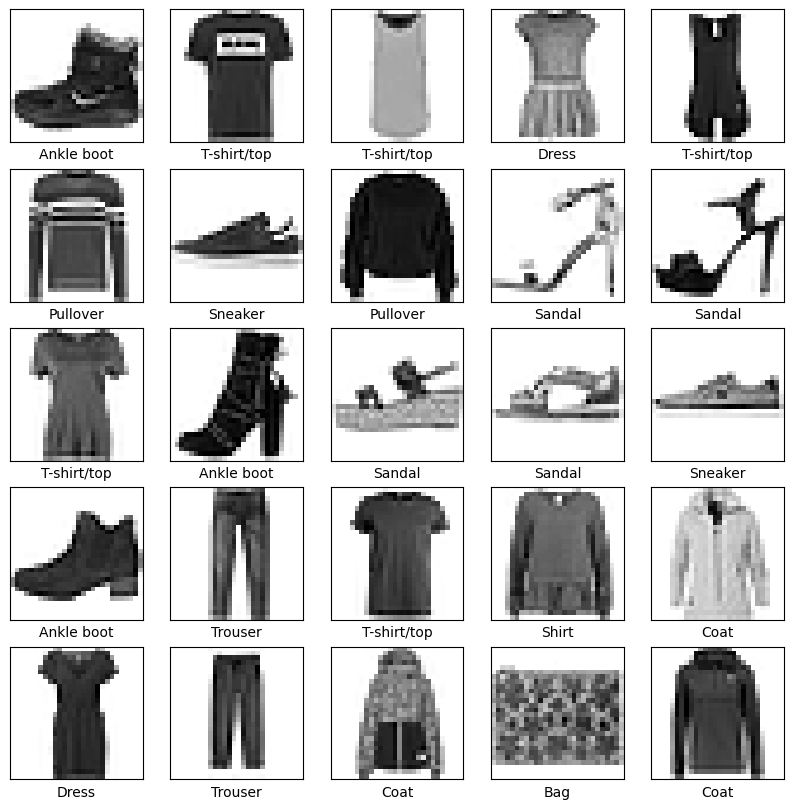

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [5]:
X_valid, X_train = X_valid / 255., X_train / 255.
X_test = X_test / 255.

In [7]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]),
                                 keras.layers.Dense(300, activation = "relu" ),
                                 keras.layers.Dense(100, activation = "relu" ),
                                 keras.layers.Dense(100, activation = "relu" ),
                                 keras.layers.Dense(100, activation = "relu" ),
                                 keras.layers.Dense(10, activation = "softmax" )])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 286810 (1.09 MB)
Trainable params: 286810 

In [9]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [10]:
history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10


1719/1719 [==============================] - 12s 6ms/step - loss: 0.8047 - accuracy: 0.7222 - val_loss: 0.5458 - val_accuracy: 0.8164
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5020 - accuracy: 0.8218 - val_loss: 0.4812 - val_accuracy: 0.8286
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4391 - accuracy: 0.8435 - val_loss: 0.3959 - val_accuracy: 0.8622
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4036 - accuracy: 0.8557 - val_loss: 0.3977 - val_accuracy: 0.8610
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3776 - accuracy: 0.8632 - val_loss: 0.3615 - val_accuracy: 0.8738
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3579 - accuracy: 0.8707 - val_loss: 0.3487 - val_accuracy: 0.8764
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3440 - accuracy: 0.8732 - val_loss: 0.3566 - val_accur

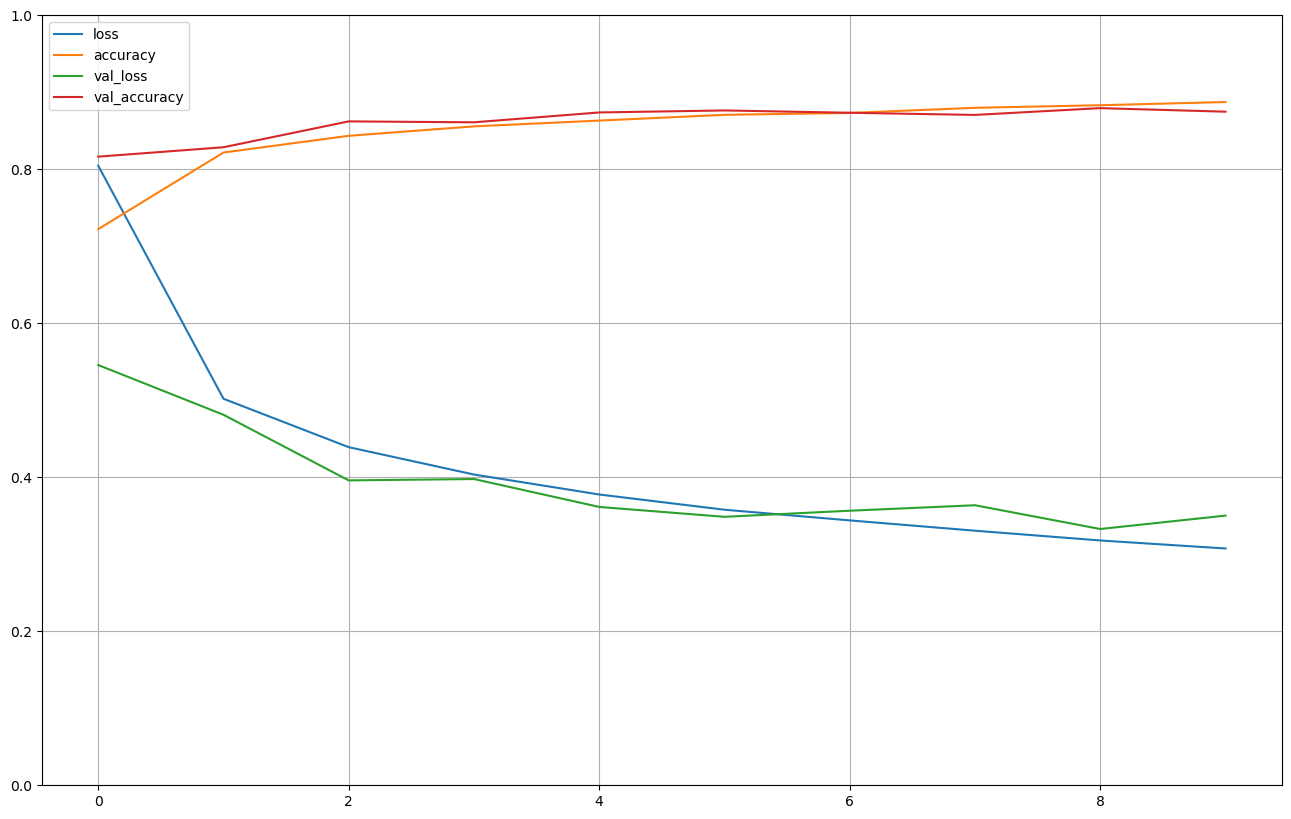

In [11]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8596


[0.3836204409599304, 0.8596000075340271]

In [13]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [14]:
print(predictions)

[[5.49188599e-06 1.86816935e-04 2.78736134e-05 ... 1.45281538e-01
  6.80039171e-04 8.17970872e-01]
 [1.15910996e-04 1.32837795e-05 9.89399195e-01 ... 7.51879384e-07
  1.81281143e-06 5.50403385e-08]
 [1.61763946e-05 9.99980092e-01 1.82541010e-06 ... 1.48534696e-07
  2.55850985e-09 4.00631421e-08]
 ...
 [9.54892603e-04 1.74153200e-07 1.32270798e-04 ... 7.41533370e-07
  9.97641563e-01 1.25625502e-06]
 [1.68756906e-05 9.99560535e-01 1.27776175e-05 ... 5.32489912e-06
  7.72954891e-08 6.97073665e-06]
 [1.20301731e-04 1.56992173e-05 1.69198276e-04 ... 1.71477869e-02
  3.09381005e-03 1.45108410e-04]]


In [6]:
def plot_image(i, predictions_array,true_label,img):
    predictions_array,true_label,img = predictions_array[i] ,true_label[i] ,img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color = color)


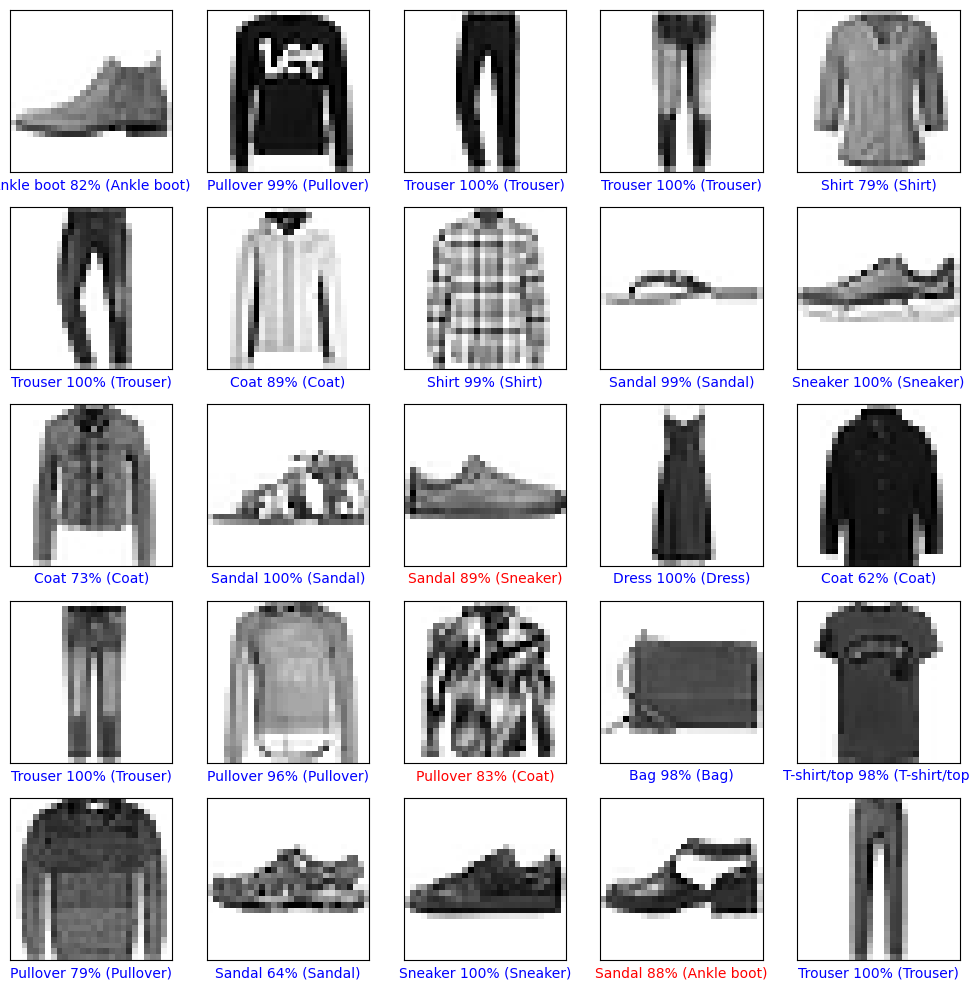

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plot_image(i, predictions,y_test,X_test)
plt.tight_layout()
plt.show()

## Using Convolutional Neural Network(CNN) for model training

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64,7, activation='relu', padding='same', input_shape=[28,28,1]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128,3, activation='relu', padding='same'),
    keras.layers.Conv2D(128,3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(256,3, activation='relu', padding='same'),
    keras.layers.Conv2D(256,3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)        

In [19]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train,
                    y_train,
                    epochs = 20,
                    validation_data = (X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 114s 66ms/step - loss: 0.9355 - accuracy: 0.6636 - val_loss: 0.6087 - val_accuracy: 0.7580
Epoch 2/20
1719/1719 [==============================] - 118s 69ms/step - loss: 0.5297 - accuracy: 0.8036 - val_loss: 0.4307 - val_accuracy: 0.8446
Epoch 3/20
1719/1719 [==============================] - 121s 70ms/step - loss: 0.4388 - accuracy: 0.8379 - val_loss: 0.4280 - val_accuracy: 0.8402
Epoch 4/20
1719/1719 [==============================] - 130s 76ms/step - loss: 0.3915 - accuracy: 0.8564 - val_loss: 0.3639 - val_accuracy: 0.8648
Epoch 5/20
1719/1719 [==============================] - 141s 82ms/step - loss: 0.3596 - accuracy: 0.8673 - val_loss: 0.3378 - val_accuracy: 0.8742
Epoch 6/20
1719/1719 [==============================] - 126s 73ms/step - loss: 0.3353 - accuracy: 0.8763 - val_loss: 0.3589 - val_accuracy: 0.8640
Epoch 7/20
1719/1719 [==============================] - 124s 72ms/step - loss: 0.3175 - accuracy: 0.8841 - val_loss: 0

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.3056 - accuracy: 0.8927


[0.3055793046951294, 0.8927000164985657]

In [22]:
predictions = model.predict(X_test)

313/313 [==============================] - 5s 17ms/step


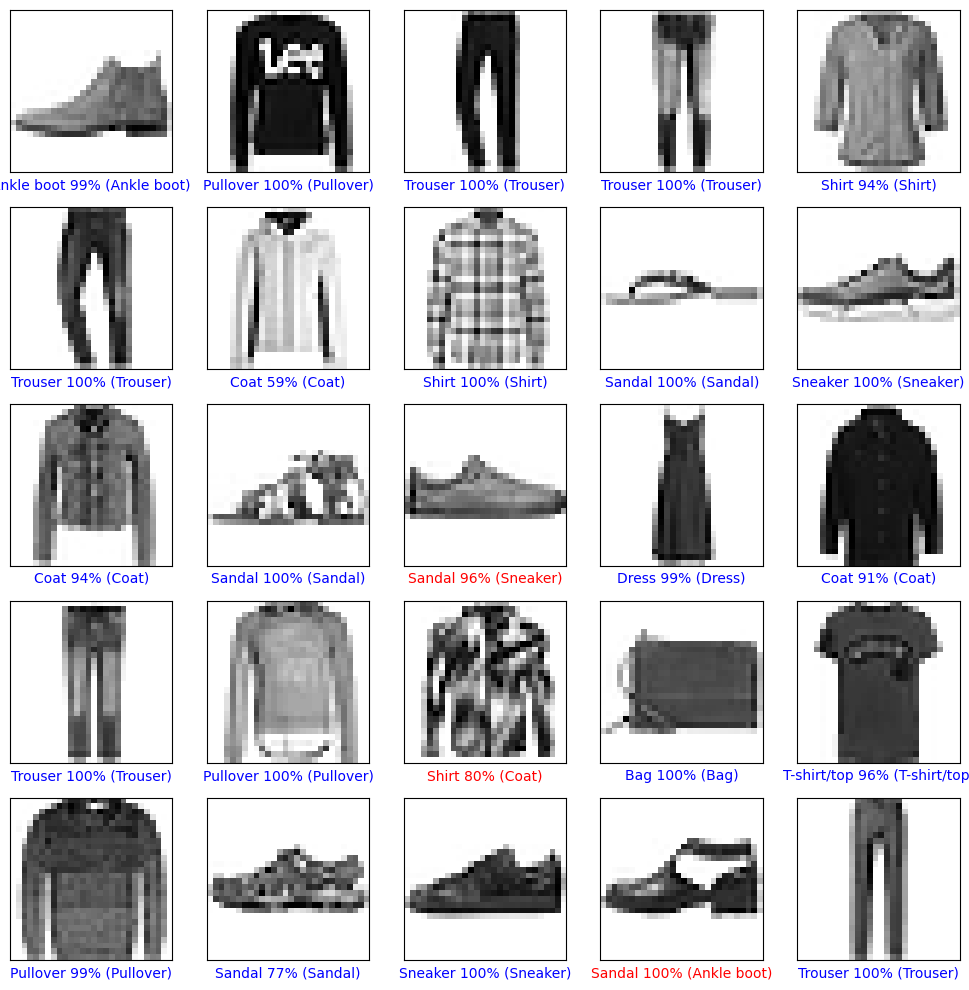

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(i, predictions, y_test, X_test)
plt.tight_layout()
plt.show()

In [55]:
from tensorflow.keras.layers import Dropout
model = keras.Sequential([
    keras.layers.Conv2D(32,3, activation='relu', padding='same', input_shape = [28,28,1]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [56]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [57]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3 , restore_best_weights=True)
history = model.fit(X_train,
                   y_train,
                   epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping])

Epoch 1/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.4198 - accuracy: 0.8492 - val_loss: 0.2856 - val_accuracy: 0.8974
Epoch 2/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2668 - accuracy: 0.9026 - val_loss: 0.2573 - val_accuracy: 0.9064
Epoch 3/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2221 - accuracy: 0.9180 - val_loss: 0.2289 - val_accuracy: 0.9130
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1888 - accuracy: 0.9307 - val_loss: 0.2580 - val_accuracy: 0.9042
Epoch 5/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1604 - accuracy: 0.9407 - val_loss: 0.2218 - val_accuracy: 0.9196
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.1397 - accuracy: 0.9481 - val_loss: 0.2331 - val_accuracy: 0.9208
Epoch 7/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.1160 - accuracy: 0.9569 - val_loss: 0.2341 -

In [58]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2368 - accuracy: 0.9173


[0.23675373196601868, 0.9172999858856201]

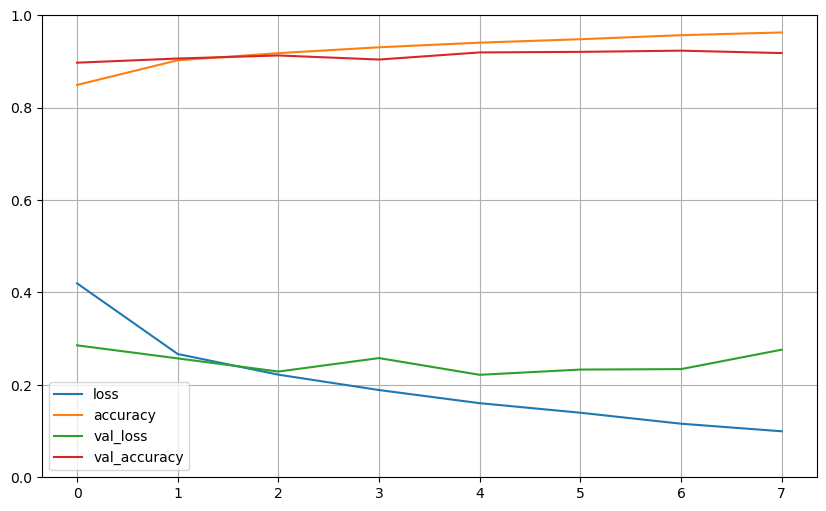

In [59]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [60]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


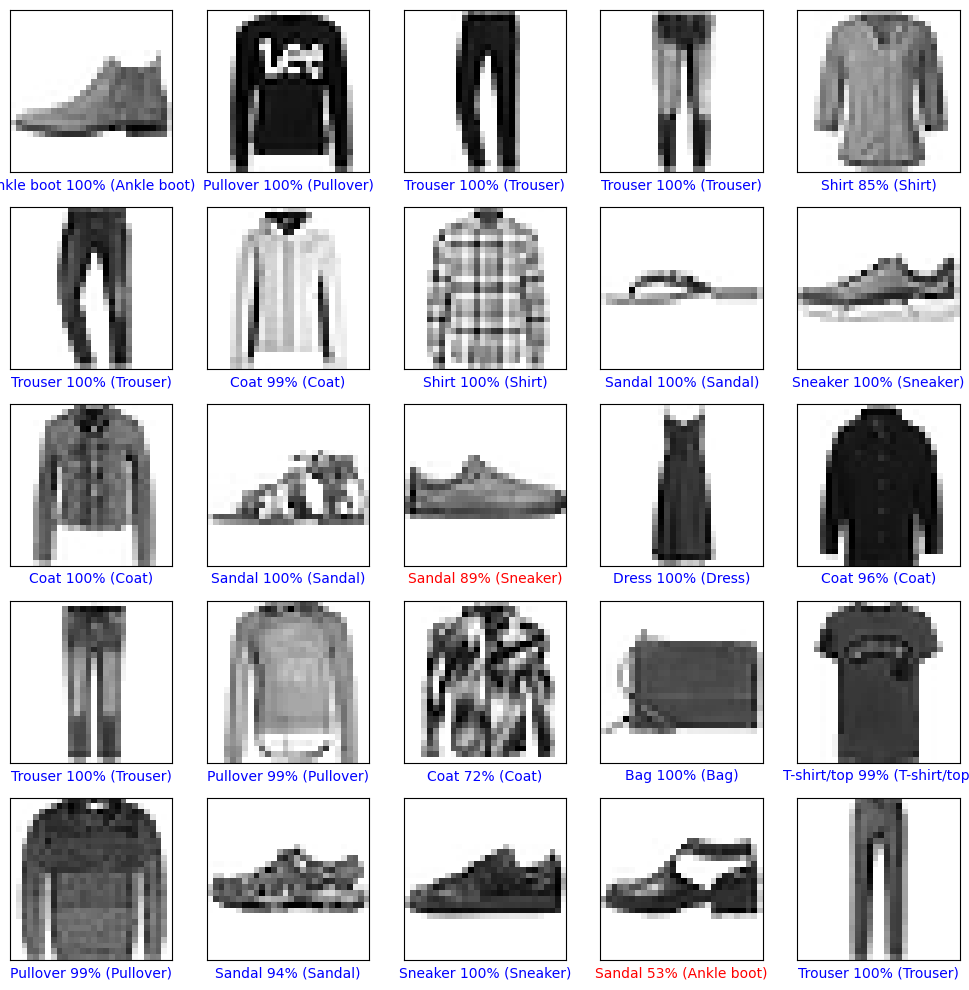

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(i, predictions, y_test,X_test)
plt.tight_layout()
plt.show()